# Homework 1: Coding

**Due Monday September 16th, 11:59pm.**

**This is an individual assignment.**

**Submit hw1.py file to Gradescope (you may submit as many times as you'd like before the deadline).**

In [0]:
"""
Import libraries that you might require.

DON'T comment out these imports when submitting your final hw1.py file.
"""

import numpy as np
import math
import matplotlib.pyplot as plt
import operator

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Question 4: KNN Classification

We will implement the KNN algorithm for the breast cancer dataset. Refer to the pdf and the following functions for the instructions. Complete all the functions as indicated below. The four functions would be autograded as mentioned in the pdf.

In [0]:
"""
Task 1: Classification

Please implement KNN for K: 3, 5, and 7 with the following norms:
L1
L2
L-inf
"""

# Read data (Breast Cancer Dataset). Remember to comment out the code not contained in a function.
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

X = breast['data']
y = breast['target']

np.random.seed(100)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

X_train, y_train = X[:400], y[:400]
X_val, y_val = X[400:500], y[400:500]
X_test, y_test = X[500:], y[500:]


def distanceFunc(metric_type, vec1, vec2):
    """
    Computes the distance between two d-dimension vectors. 
    
    Please DO NOT use Numpy's norm function when implementing this function. 
    
    Args:
        metric_type (str): Metric: L1, L2, or L-inf
        vec1 ((d,) np.ndarray): d-dim vector
        vec2 ((d,) np.ndarray): d-dim vector
    
    Returns:
        distance (float): distance between the two vectors
    """

    diff = vec1 - vec2
    diff = np.absolute(diff)
    if metric_type == "L1":
#         distance = 0 #complete
        distance = np.sum(np.absolute(diff))

    if metric_type == "L2":
#         distance = 0 #complete
        distance = np.sqrt(np.sum(np.square(diff)))
        
        
    if metric_type == "L-inf":
#         distance = 0 #complete
        distance = np.amax(diff)
        
    return distance


def computeDistancesNeighbors(K, metric_type, X_train, y_train, sample):
    """
    Compute the distances between every datapoint in the train_data and the 
    given sample. Then, find the k-nearest neighbors.
    
    Return a numpy array of the label of the k-nearest neighbors.
    
    Args:
        K (int): K-value
        metric_type (str): metric type
        X_train ((n,p) np.ndarray): Training data with n samples and p features
        y_train : Training labels
        sample ((p,) np.ndarray): Single sample whose distance is to computed with every entry in the dataset
        
    Returns:
        neighbors (list): K-nearest neighbors' labels
    """

    # You will also call the function "distanceFunc" here
    # Complete this function
    
    # calculate distance
    list_dist = []
    for ele_train in X_train:
        dist = distanceFunc(metric_type, ele_train, sample)
        list_dist.append(dist)
    list_arg = np.argsort(list_dist)
    list_arg = list_arg[:K]

    # get corresponding labels
    neighbors = [y_train[i] for i in list_arg]
    
    return neighbors


def Majority(neighbors):
    """
    Performs majority voting and returns the predicted value for the test sample.
    
    Since we're performing binary classification the possible values are [0,1].
    
    Args:
        neighbors (list): K-nearest neighbors' labels
        
    Returns:
        predicted_value (int): predicted label for the given sample
    """
    
    # Performs majority voting
    # Complete this function
    
    total = len(neighbors)
    sucess = np.sum(np.array(neighbors))
    fail = total - sucess

    # judge
    if sucess > fail:
        predicted_value = 1
    else:
        predicted_value = 0
    
    return predicted_value


def KNN(K, metric_type, X_train, y_train, X_val):
    """
    Returns the predicted values for the entire validation or test set.
    
    Please DO NOT use Scikit's KNN model when implementing this function. 

    Args:
        K (int): K-value
        metric_type (str): metric type
        X_train ((n,p) np.ndarray): Training data with n samples and p features
        y_train : Training labels
        X_val ((n, p) np.ndarray): Validation or test data
        
    Returns:
        predicted_values (list): output for every entry in validation/test dataset 
    """
    
    # Complete this function
    # Loop through the val_data or the test_data (as required)
    # and compute the output for every entry in that dataset  
    # You will also call the function "Majority" here
    
    # loop through val/test set
    predictions = []
    for ele_val in X_val:
        neighbors = computeDistancesNeighbors(K, metric_type, X_train, y_train, ele_val)
        pred = Majority(neighbors)
        predictions.append(pred)

    return predictions


def evaluation(predicted_values, actual_values):
    """
    Computes the accuracy of the given datapoints.
    
    Args:
        predicted_values ((n,) np.ndarray): Predicted values for n samples
        actual_values ((n,) np.ndarray): Actual values for n samples
    
    Returns:
        accuracy (float): accuracy
    """
    
    return accuracy_score(predicted_values, actual_values)


def main():
    """
    Calls the above functions in order to implement the KNN algorithm.
    
    Test over the following range K = 3,5,7 and all three metrics. 
    In total you will have nine combinations to try.
    
    PRINTS out the accuracies for the nine combinations on the validation set,
    and the accuracy on the test set for the selected K value and appropriate norm.
    
    REMEMBER: You have to report these values by populating the Table 2 in the latex file.
    """
    
    ## Complete this function
    
    K = [3,5,7]
    norm = ["L1", "L2", "L-inf"]
    
    print("<<<<VALIDATION DATA PREDICTIONS>>>>")
    
    ## Complete
    for ele_K in K:
        for ele_norm in norm:
            ele_pred = KNN(ele_K, ele_norm, X_train, y_train, X_val)
            ele_acc = evaluation(ele_pred, y_val)
            print('accuracy for K=' + str(ele_K) + ', norm=' + ele_norm + ':' + str(ele_acc))
#     predictions = KNN(K[0], norm[1], X_train, y_train, X_val)
#     predictions = KNN(K[2], norm[1], X_train, y_train, X_test)
#     print('predictions:', predictions)
    
    print("<<<<TEST DATA PREDICTIONS>>>>")
    
    ## Complete
    for ele_K in K:
        for ele_norm in norm:
            ele_pred = KNN(ele_K, ele_norm, X_train, y_train, X_test)
            ele_acc = evaluation(ele_pred, y_test)
            print('accuracy for K=' + str(ele_K) + ', norm=' + ele_norm + ':' + str(ele_acc))
#     acc = evaluation(predictions, y_val)
#     acc = evaluation(predictions, y_test)
#     print('accuracy:', acc)


Uncomment the code below to run the main function (Remember to recomment the code before submitting).

In [3]:
# Finally, call the main function
main()

<<<<VALIDATION DATA PREDICTIONS>>>>
accuracy for K=3, norm=L1:0.94
accuracy for K=3, norm=L2:0.95
accuracy for K=3, norm=L-inf:0.94
accuracy for K=5, norm=L1:0.94
accuracy for K=5, norm=L2:0.93
accuracy for K=5, norm=L-inf:0.94
accuracy for K=7, norm=L1:0.93
accuracy for K=7, norm=L2:0.92
accuracy for K=7, norm=L-inf:0.93
<<<<TEST DATA PREDICTIONS>>>>
accuracy for K=3, norm=L1:0.8840579710144928
accuracy for K=3, norm=L2:0.8840579710144928
accuracy for K=3, norm=L-inf:0.8985507246376812
accuracy for K=5, norm=L1:0.9130434782608695
accuracy for K=5, norm=L2:0.8985507246376812
accuracy for K=5, norm=L-inf:0.8985507246376812
accuracy for K=7, norm=L1:0.8985507246376812
accuracy for K=7, norm=L2:0.9130434782608695
accuracy for K=7, norm=L-inf:0.8985507246376812


### Question 4 Report in LaTeX

Answer the following questions in your LaTeX document:

1. How could having a larger dataset influence the performance of KNN?

2. Tabulate your results from `main()` in the table provided in the LaTeX template.

3. Finally, mention the best K and the norm combination you have settled upon and report the accuracy on the test set using that combination.


# Question 5: Decision Tree Classification

### Helper functions
The block below contains helper functions for this task.

In [0]:
# Below are a list of helper functions to use to help you on this task

def train_decision_tree(X, y, depth=None, leaf_count=None):
    """
    Trains a decision tree classifier on the given X, y data with the specified 
    tree depth d and max leaf node count max_leaf_num.

    Args:
    X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                          p (number of features) matrix
    y ((n,) np.ndarray): The input ys, which are in an n length array
    depth (int): The maximum depth of the tree. A value of None means no restrictions
             on the depth of the tree.
    leaf_count (int): The maximum leaf count of the tree's leaf nodes. A value of None means 
    no restrictions on the leaf count of the tree.

    Returns:
    clf(DecisionTreeClassifier): the trained decision tree classifier
    """

    clf = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf_count, criterion="entropy", random_state=1)
    clf.fit(X,y)
    return clf


def predict(clf, X_test):
    """
    Uses a trained decision tree classifier to predict on a given test set.

    Args:
    clf (DecisionTreeClassifier): Trained Decision Tree Classifer
    X_test ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                               p (number of features) matrix

    Returns:
    y_pred ((n,) np.ndarray): The output predictions, which are in an n length array
    """

    y_pred = clf.predict(X_test)
    return y_pred


def evaluate(predicted_values, actual_values):
    """
    Computes the accuracy of the given datapoints.
    
    Args:
        predicted_values: numpy array
        actual_values: numpy array
    
    Returns:
        a floating point number representing the accuracy
    """
    
    from sklearn.metrics import accuracy_score
    return accuracy_score(predicted_values, actual_values)
  
    
def plot_line_graph(x_vals, y_vals_1, y_vals_2, y_vals_1_label, y_vals_2_label, x_axis_label, y_axis_label, title):
    """
    Plots a line graph of two lines of different values with common x-values

    Args:
    x_vals ((j,) list): Values to be displayed on horizontal axis, where j is number of values
    y_vals_1 ((j,) list): First set of values to be graphed on a line in respect to x_vals, where j is number of values
    y_vals_2 ((j,) list): Second set of values to be graphed on a line in respect to x_vals, where j is number of values
    y_vals_1_label (string): Label for first set of y values
    y_vals_2_label (string): Label for second set of y values
    x_axis_label (string): Label for x axis
    y_axis_label (string): Label for y axis
    title (string): Plot title
    """ 

    plt.plot(x_vals, y_vals_1, color='g', label=y_vals_1_label)
    plt.plot(x_vals, y_vals_2, color='orange', label=y_vals_2_label)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

### Compare Accuracy for full classification dataset as well as smaller classification dataset
We will be using the breast cancer classification dataset. You are also given a smaller training dataset with the same data as the full dataset but with only half of the sample number. We will observe the performance changes when less data is available.

To start, uncomment the code below and run to retrieve the data. (Recomment before submission)

In [0]:
# We will also use the same breast cancer classification dataset in Task 1.
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

X = breast['data']
y = breast['target']

np.random.seed(100)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

X_train, y_train = X[:400], y[:400]
X_val, y_val = X[400:500], y[400:500]
X_test, y_test = X[500:], y[500:]

# Let's create a smaller version of the training dataset using only half of the data available
train_sample_num_small = int(X_train.shape[0] / 2)
X_train_small, y_train_small = X_train[:train_sample_num_small], y_train[:train_sample_num_small]

### Base Metrics on Full and Partial Data
To start, you will be comparing the training and testing accuracies of both datasets given a vanilla decision tree.

Note: Make sure to create two separate classifiers for each dataset.

In [0]:
def base_metrics(X_train, y_train, X_train_small, y_train_small, X_val, y_val, X_test, y_test):
    """
    Create a decision tree classifer on the full dataset and the partial dataset (only half of n).

    Args: (Note that n is not the same among train and test sets, but merely refers to sample size)
        X_train ((n,p) np.ndarray): Input feature matrix of full dataset for training/fitting
        y_train ((n,) np.ndarray): Input label array of full dataset for training/fitting
        X_train_small ((n,p) np.ndarray): Input feature matrix of partial/small dataset for training/fitting
        y_train_small ((n,) np.ndarray): Input label array of partial/small dataset for training/fitting
        X_val ((n,p) np.ndarray): Input feature matrix of full dataset for validation
        y_val ((n,) np.ndarray): Input label array of full dataset for validation
        X_test ((n,p) np.ndarray): Input feature matrix of full dataset for testing
        y_test ((n,) np.ndarray): Input label array of full dataset for testing    

    Returns:
        train_acc_full_set (float): Training accuracy using a model trained on the full dataset
        val_acc_full_set (float): Validation accuracy using a model trained on the full dataset
        test_acc_full_set (float): Test accuracy using a model trained on the full dataset
        train_acc_small_set (float): Training accuracy using a model trained on the small dataset
        val_acc_small_set (float): Validation accuracy using a model trained on the small dataset
        test_acc_small_set (float): Test accuracy using a model trained on the small dataset
    """

    # <---- Your code here ----->
    
    # training based on original dataset
    clf = train_decision_tree(X_train, y_train)
    
    pred_train = predict(clf, X_train)
    pred_val = predict(clf, X_val)
    pred_test = predict(clf, X_test)
    
    train_acc_full_set = evaluate(pred_train, y_train)
    val_acc_full_set = evaluate(pred_val, y_val)
    test_acc_full_set = evaluate(pred_test, y_test)
    
    
    # training based on small dataset
    clf_small = train_decision_tree(X_train_small, y_train_small)
    
    pred_small_train = predict(clf_small, X_train_small)
    pred_small_val = predict(clf_small, X_val)
    pred_small_test = predict(clf_small, X_test)
    
    train_acc_small_set = evaluate(pred_small_train, y_train_small)
    val_acc_small_set = evaluate(pred_small_val, y_val)
    test_acc_small_set = evaluate(pred_small_test, y_test)

    # <---- Your code here ----->

    print("Train Accuracy on Full Dataset: ", train_acc_full_set)
    print("Validation Accuracy on Full Dataset: ", val_acc_full_set)
    print("Test Accuracy on Full Dataset: ", test_acc_full_set)
    print("Train Accuracy on Small (Half) Dataset: ", train_acc_small_set)
    print("Validation Accuracy on Small (Half) Dataset: ", val_acc_small_set)
    print("Test Accuracy on Small (Half) Dataset: ", test_acc_small_set)

    return (train_acc_full_set, 
          val_acc_full_set, 
          test_acc_full_set,
          train_acc_small_set, 
          val_acc_small_set, 
          test_acc_small_set)

Uncomment the code below and run the code. (Remember to recomment the code before submitting).

In [7]:
base_metrics(X_train, y_train, X_train_small, y_train_small, X_val, y_val, X_test, y_test)

Train Accuracy on Full Dataset:  1.0
Validation Accuracy on Full Dataset:  0.92
Test Accuracy on Full Dataset:  0.9130434782608695
Train Accuracy on Small (Half) Dataset:  1.0
Validation Accuracy on Small (Half) Dataset:  0.91
Test Accuracy on Small (Half) Dataset:  0.8840579710144928


(1.0, 0.92, 0.9130434782608695, 1.0, 0.91, 0.8840579710144928)

### Question 5.1 Report on LaTeX
Answer the following questions on LaTeX in the respective section.
1. Report the results of the accuracies on LateX.
2. Which dataset had a higher difference between training and test accuracy? Briefly explain why.

### Improving Decision Tree for Smaller Dataset by Tuning Hyperparameters
Classifiers often overfit on smaller datasets, so now, we will optimize hyperparameters on tree depth and max leaf count to improve the performance of our model. 

Fill out the helper functions below which will take an array of hyperparameter values for tree depth and an array of hyperparameter values for max leaf count. The helper function will return a training and validation accuracy score for every pair of hyperparameter values. This is referred to as **grid search** for hyperparameter tuning.

At the end, the function identifies the best value of the tree depth and tree node count hyperparameters for a dataset, as well as the final training and testing scores.

Note: Use the highest validation score to choose the optimal hyperparameter combination. If there is a tie, use the lower hyperparameter value.

In [0]:
def grid_search_depth_and_leaf_count(depth_search_space, leaf_count_search_space, X_train, y_train, X_val, y_val):
    """
    Perform a decision tree hyperparameter grid search on tree depth and leaf count given training and validation data.

    Please do not use Numpy's norm function when implementing this function. 


    Args:
        depth_search_space ((d,) list): Tree depth values to search over, i.e. [1, 3, 6, 10, 30]
        leaf_count_search_space ((l,) list): Max leaf count values to search over, i.e. [2, 3, 4, 5, 6]
        X_train ((n, p) np.ndarray): The input feature matrix for training
        y_train ((n, p) np.ndarray): The input ys for training
        X_val ((n, p) np.ndarray): The input feature matrix that will be used to validate accuracy scores
        y_val ((n, p) np.ndarray): The input ys that will be used to validate accuracy scores

    Returns:
        best_depth (int): The depth count in the hyperparameter combination with the largest validation score
        best_leaf_count (int): The leaf count in the hyperparameter combination with the largest validation score
    """

    # <---- Your code here ----->
    
    list_acc = []
    list_depth = []
    list_leaf = []
    # search all combinations
    for ele_depth in depth_search_space:
        for ele_leaf in leaf_count_search_space:
            # train model and get accuracy
            ele_clf = train_decision_tree(X_train, y_train, depth=ele_depth, leaf_count=ele_leaf)
            ele_pred = predict(ele_clf, X_val)
            ele_acc = evaluate(ele_pred, y_val)
            list_acc.append(ele_acc)
            list_depth.append(ele_depth)
            list_leaf.append(ele_leaf)
    # get best combination
    idx = np.argmax(list_acc)
    best_depth = list_depth[idx]
    best_leaf_count = list_leaf[idx]

    # <---- Your code here ----->

    print("Chosen Depth: ", best_depth)
    print("Chosen Leaf: ", best_leaf_count)

    return best_depth, best_leaf_count

Uncomment and run the code below to and record the best depth and best leaf count hyperparameters on LaTeX in the respective section.

In [9]:
# Search spaces for grid search to tune tree depth and leaf count hyperparameters
depth_search_space = [2, 4, 6, 8, 10, 16, 20]
leaf_count_search_space = [2, 3, 4, 5, 6, 7, 8, 9, 10]

print("FULL DATASET")
grid_search_depth_and_leaf_count(depth_search_space, 
                                 leaf_count_search_space, 
                                 X_train, 
                                 y_train, 
                                 X_val, 
                                 y_val)

print("\nSMALL DATASET")
grid_search_depth_and_leaf_count(depth_search_space, 
                                 leaf_count_search_space, 
                                 X_train_small, 
                                 y_train_small, 
                                 X_val,
                                 y_val)

FULL DATASET
Chosen Depth:  4
Chosen Leaf:  5

SMALL DATASET
Chosen Depth:  2
Chosen Leaf:  3


(2, 3)

### Question 5.2 Report in LaTeX
Answer the following questions in your LaTeX document.
1. Report the chosen hyperparameters for both the complete set and the partial set.
2. Did the small dataset have higher or lower chosen hyperparameter values than the full dataset? Briefly explain why.

### Retrain Decision Tree and Plot Hyperparameter Search
Now retrain your decision tree with the optimal hyperparameters. Report training, validation, and testing error for the small dataset.

Also for the small dataset, create a graph plotting the training and validation scores for each leaf node hyperparameter value, holding the tree depth hyperparameter consistent at the chosen value.

In [0]:
def retrain_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test):
    """
    Perform a decision tree hyperparameter grid search given training and validation 
    data and search values for tree depth and leaf node count.

    We also train decision trees by iterating over the entire leaf count space
    and holding the chosen_depth constant to observe the change in accuracy.
    
    Args: (Note that n is not the same among train and test sets, but merely refers to sample size)
        X_train ((n,p) np.ndarray)
        y_train ((n,) np.ndarray)
        X_val ((n,p) np.ndarray)
        y_val ((n,) np.ndarray)
        X_test ((n,p) np.ndarray)
        y_test ((n,) np.ndarray)

    Returns:
        train_acc (float): Optimal Hyperparameters Train Accuracy
        val_acc (float): Optimal Hyperparameters Train Accuracy
        test_acc (float): Optimal Hyperparameters Train Accuracy

        leaf_count_train_scores (list): Report training scores for the entire leaf 
                                        count search space, holding chosen_depth constant
        leaf_count_val_scores (list): Report validation scores for the entire leaf 
                                      count search space, holding chosen_depth constant
    """

    # Select best hyperparameters
    depth_search_space = [2, 4, 6, 8, 10, 16, 20]
    leaf_count_search_space = [2, 3, 4, 5, 6, 7, 8, 9, 10] 

    chosen_depth, chosen_leaf_count = grid_search_depth_and_leaf_count(depth_search_space, 
                                                                     leaf_count_search_space, 
                                                                     X_train, 
                                                                     y_train, 
                                                                     X_val, 
                                                                     y_val)

    # <---- Your code here ----->  
    
    # ====== PART 1 ======
    # reconstruct decision tree
    clf_optim = train_decision_tree(X_train, y_train, depth=chosen_depth, leaf_count=chosen_leaf_count)
    # get prediction
    pred_optim_train = predict(clf_optim, X_train)
    pred_optim_val = predict(clf_optim, X_val)
    pred_optiml_test = predict(clf_optim, X_test)
    #get accuracy
    train_acc = evaluate(pred_optim_train, y_train)
    val_acc = evaluate(pred_optim_val, y_val)
    test_acc = evaluate(pred_optiml_test, y_test)
    
    # ====== PART 2 ======
    leaf_count_train_scores = []
    leaf_count_val_scores = []
    for ele_leaf in leaf_count_search_space:
        # construct model
        ele_clf = train_decision_tree(X_train, y_train, depth=chosen_depth, leaf_count=ele_leaf)
        # get prediction
        ele_pred_train = predict(ele_clf, X_train)
        ele_pred_val = predict(ele_clf, X_val)
        # get accuracy
        ele_acc_train = evaluate(ele_pred_train, y_train)
        ele_acc_val = evaluate(ele_pred_val, y_val)
        # update list
        leaf_count_train_scores.append(ele_acc_train)
        leaf_count_val_scores.append(ele_acc_val)

    # <---- Your code here ----->

    print("Optimal Hyperparameters Train Accuracy: ", train_acc)
    print("Optimal Hyperparameters Validation Accuracy: ", val_acc)
    print("Optimal Hyperparameters Test Accuracy: ", test_acc)

    print("Training Scores per Max Leaf Node Count:", leaf_count_train_scores)
    print("Validation Scores per Max Leaf Node Count:", leaf_count_val_scores)

    return(train_acc, val_acc, test_acc, leaf_count_train_scores, leaf_count_val_scores)

Run the code above for the small dataset and by uncommenting code below. Report all necessary values and both graphs on Latex.

Chosen Depth:  2
Chosen Leaf:  3
Optimal Hyperparameters Train Accuracy:  0.955
Optimal Hyperparameters Validation Accuracy:  0.93
Optimal Hyperparameters Test Accuracy:  0.8985507246376812
Training Scores per Max Leaf Node Count: [0.945, 0.955, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]
Validation Scores per Max Leaf Node Count: [0.91, 0.93, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]


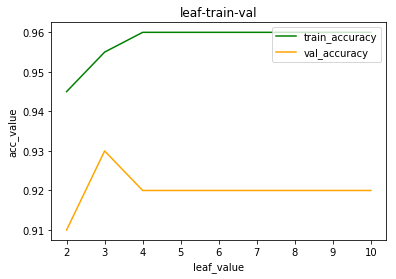

In [11]:
(train_acc, val_acc, test_acc, leaf_count_train_scores, leaf_count_val_scores) = retrain_decision_tree(X_train_small, y_train_small, X_val, y_val, X_test, y_test)

# plot
leaf_count_search_space = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plot_line_graph(leaf_count_search_space, leaf_count_train_scores, leaf_count_val_scores, 'train_accuracy', 'val_accuracy', 'leaf_value', 'acc_value', 'leaf-train-val')

### Question 5.3 Report on LaTeX
Answer the followings question on LaTeX in the respective section.
1. Report the values in your LaTeX document.
2. How did the training accuracy and testing accuracy change after tuning compared to before? Briefly explain why.
3. Paste the plot and explain any trends or patterns with the plot within validation and training scores and briefly explain why.

# Question 6: Feature Scaling Effects on KNNs and DTs

### Observing effects of standardizing features

Up until now, we have not been using standardized features. Let's observe the effects of standardized features with decision trees and KNNs.

Standardization, or feature scaling / data normalization, is a common preprocessing step for data within machine learning. We will see why it's important.

Here is a definition taken from SK-Learn's website on Standardization:

*Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.*

*In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.*

Learn More: https://scikit-learn.org/stable/modules/preprocessing.html

To start, uncomment the code below and run to retrieve the data. (Recomment before submission.)

In [0]:
# # We will also use the same breast cancer classification dataset in Task 1.
# # from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

X = breast['data']
y = breast['target']

np.random.seed(100)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

X_train, y_train = X[:400], y[:400]
X_val, y_val = X[400:500], y[400:500]
X_test, y_test = X[500:], y[500:]

# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Helper Functions
  
We implemented above the KNN algorithm. Sci-kit learn also has their own version of the KNN algorithm which we will use in this following task. Use the two helper functions below in this next task.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

def train_KNN(X, y, norm=2, K=5):
    """
    Trains a KNN classifier on the given X, y data with the specified 
    norm and K.

    Args:
        X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                              p (number of features) matrix
        y ((n,) np.ndarray): The input ys, which are in an n length array
        norm (int): The number form of the norm. Note that sklearn only allows L1 and L2 norms,
                    (norm would be 1 and 2 respectively). Default is 2.
        K (int): The value of K for the KNN algorithm. Default is 5.

    Returns:
        clf(KNeighborsClassifier): the trained KNN model
    """

    clf = KNeighborsClassifier(n_neighbors=K, p=norm)
    clf.fit(X,y)
    return clf


def train_decision_tree(X, y, depth=None, leaf_count=None):
    """
    This helper function is defined again from a previous section. 

    Trains a decision tree classifier on the given X, y data with the specified 
    tree depth d and max leaf node count max_leaf_num.

    Args:
        X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                              p (number of features) matrix
        y ((n,) np.ndarray): The input ys, which are in an n length array
        depth (int): The maximum depth of the tree. A value of None means no restrictions
                 on the depth of the tree. Default is None.
        leaf_count (int): The maximum leaf count of the tree's leaf nodes. A value of None means 
        no restrictions on the leaf count of the tree. Default is None.

    Returns:
        clf(DecisionTreeClassifier): the trained decision tree
    """

    clf = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf_count, criterion="entropy", random_state=1)
    clf.fit(X,y)
    return clf


def predict(clf, X_test):
    """
    This helper function is defined again from a previous section. 

    Uses a trained model to predict on a given test set.

    Args:
        clf (Classifier): Trained classifier such as KNN or Decision Tree
        X_test ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                                   p (number of features) matrix

    Returns:
        y_pred ((n,) np.ndarray): The output predictions, which are in an n length array
    """

    y_pred = clf.predict(X_test)
    return y_pred


def evaluate(predicted_values, actual_values):
    """
    This helper function is defined again from a previous section. 
    
    Computes the accuracy of the given datapoints.
    
    Args:
        predicted_values: numpy array
        actual_values: numpy array
    
    Returns:
        a floating point number representing the accuracy
    """
    return accuracy_score(predicted_values, actual_values)

### Retrieving Metrics for Unstandardized Data
Fill out this function to retrieve training and test accuracies for both KNN and decision tree models. Use default hyperparameters.

In [0]:
def get_classifier_metrics(X_train, y_train, X_test, y_test):
    """
    Create a decision tree and KNN classifer on the normal dataset.
    Retrieve accuracy metrics using models trained on default hyperparameters:

    Args: (Note that n is not the same among train and test sets, 
         but merely refers to sample size)
        X_train ((n,p) np.ndarray)
        y_train ((n,) np.ndarray)
        X_test ((n,p) np.ndarray)
        y_test ((n,) np.ndarray)

    Returns:
        knn_train_accuracy (float): Accuracy of KNN for train set
        knn_test_accuracy (float): Accuracy of KNN for test set
        dt_train_accuracy (float): Accuracy of DT for train set
        dt_test_accuracy (float): Accuracy of DT for test set    
    """

    # <---- Your code here ----->
    
    # KNN model
    clf_KNN = train_KNN(X_train, y_train)
    pred_KNN_train = predict(clf_KNN, X_train)
    pred_KNN_test = predict(clf_KNN, X_test)
    knn_train_accuracy = evaluate(pred_KNN_train, y_train)
    knn_test_accuracy = evaluate(pred_KNN_test, y_test)
    
    # decision tree model
    clf_dt = train_decision_tree(X_train, y_train)
    pred_dt_train = predict(clf_dt, X_train)
    pred_dt_test = predict(clf_dt, X_test)
    dt_train_accuracy = evaluate(pred_dt_train, y_train)
    dt_test_accuracy = evaluate(pred_dt_test, y_test)

    # <---- Your code here ----->

    print("knn_train_accuracy: ", knn_train_accuracy)
    print("knn_test_accuracy: ", knn_test_accuracy)
    print("dt_train_accuracy: ", dt_train_accuracy)
    print("dt_test_accuracy: ", dt_test_accuracy)

    return knn_train_accuracy, knn_test_accuracy, dt_train_accuracy, dt_test_accuracy

Uncomment the code below and run the code (remember to recomment before submitting).

In [15]:
print("FOR UNSTANDARDIZED DATA")
get_classifier_metrics(X_train, y_train, X_test, y_test)

print("\nFOR STANDARDIZED DATA")
get_classifier_metrics(X_train_scaled, y_train, X_test_scaled, y_test)

FOR UNSTANDARDIZED DATA
knn_train_accuracy:  0.9475
knn_test_accuracy:  0.8985507246376812
dt_train_accuracy:  1.0
dt_test_accuracy:  0.9130434782608695

FOR STANDARDIZED DATA
knn_train_accuracy:  0.9775
knn_test_accuracy:  0.9565217391304348
dt_train_accuracy:  1.0
dt_test_accuracy:  0.9130434782608695


(0.9775, 0.9565217391304348, 1.0, 0.9130434782608695)

### Question 6 Report in LaTeX
Answer the following questions in your LaTeX document.
1. Report the values in LaTeX.
2. What happens to performance when we use standardization for data with decision trees? What about KNN? Briefly explain why each happened.

# Turning it in


**Remember to recomment all script portions of this notebook before submitting (i.e. any code not in a function, excluding code that imports libraries). This is to ensure that the Autograder works properly. Also make sure you did not edit other sections of the code outside of specified areas.**

1. Download this notebook as a `hw1.py` file with the functions implemented and the sandbox code commented out
  - If using Google Colab, go to "File -> Download .py"
  - If using Jupyter locally, go to "File -> Download as -> Python (.py)"
  
2. Submit `hw1.py` file to Gradescope (you can do this as many times as you'd like before the deadline)